In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.io as scio
import folium
from folium.plugins import HeatMap
import math
import bisect
import os
import json
import torch
from tqdm import tqdm
from tqdm.std import trange
import copy
import cv2

In [2]:
########################### Create Dataset New!!!
class datasetItem:
    def __init__(self, index):
        self.index = index
        self.global_id = None
        self.img_path = ''
        self.img_shape = None
        self.lanes = []
        self.prob = []
        self.solid_prob = []
        self.solid_type = []

def to_dataset(data, # input
               dataset # output
              ):
    file_unreaded = True
    data_item_idx = 0

    print('to create dataset')

    for idx, index in tqdm( enumerate(data['index']) ):
        points = []
        if index == 0 and file_unreaded: # file not readed, first lane of image

            file_unreaded = False
            data_item = datasetItem(data_item_idx)
            data_item.global_id = data['global_id'][idx]
            data_item.img_path  = data['img'][idx]
            data_item.img_shape = (data['img_width'][idx], data['img_height'][idx])

            data_item.lanes.append(json.loads(data['points'][idx]))
            data_item.prob.append(data['prob'][idx])
            data_item.solid_prob.append(data['solid_prob'][idx])
            data_item.solid_type.append(data['solid_type'][idx])

            dataset.append(data_item) # create new item
            
        elif index == 0 and not file_unreaded: # file readed, first lane of image

            data_item = datasetItem(data_item_idx)
            data_item.global_id = data['global_id'][idx]
            data_item.img_path  = data['img'][idx]
            data_item.img_shape = (data['img_width'][idx], data['img_height'][idx])

            data_item.lanes.append(json.loads(data['points'][idx]))
            data_item.prob.append(data['prob'][idx])
            data_item.solid_prob.append(data['solid_prob'][idx])
            data_item.solid_type.append(data['solid_type'][idx])

            dataset.append(data_item) # create new item
            
        else: # following lanes of image
            dataset[-1].lanes.append(json.loads(data['points'][idx]))
            dataset[-1].prob.append(data['prob'][idx])
            dataset[-1].solid_prob.append(data['solid_prob'][idx])
            dataset[-1].solid_type.append(data['solid_type'][idx])
    print('done')

In [3]:
########################### Create Dataset
class datasetItem:
    def __init__(self, index):
        self.index = index
        self.img_path = ''
        self.img_shape = None
        self.lanes = []
        self.prob = []
        self.solid_prob = []
        self.solid_type = []

def to_dataset(data, # input
               dataset # output
              ):
    file_unreaded = True
    data_item_idx = 0

    print('to create dataset')

    for idx, index in tqdm( enumerate(data['index']) ):
        points = []
        if index == 0 and file_unreaded: # file not readed, first lane of image

            file_unreaded = False
            data_item = datasetItem(data_item_idx)
            data_item.img_path  = data['img'][idx]
            data_item.img_shape = (data['img_width'][idx], data['img_height'][idx])

            data_item.lanes.append(json.loads(data['points'][idx]))
            data_item.prob.append(data['prob'][idx])
            data_item.solid_prob.append(data['solid_prob'][idx])
            data_item.solid_type.append(data['solid_type'][idx])

            dataset.append(data_item) # create new item
            
        elif index == 0 and not file_unreaded: # file readed, first lane of image

            data_item = datasetItem(data_item_idx)
            data_item.img_path  = data['img'][idx]
            data_item.img_shape = (data['img_width'][idx], data['img_height'][idx])

            data_item.lanes.append(json.loads(data['points'][idx]))
            data_item.prob.append(data['prob'][idx])
            data_item.solid_prob.append(data['solid_prob'][idx])
            data_item.solid_type.append(data['solid_type'][idx])

            dataset.append(data_item) # create new item
            
        else: # following lanes of image
            dataset[-1].lanes.append(json.loads(data['points'][idx]))
            dataset[-1].prob.append(data['prob'][idx])
            dataset[-1].solid_prob.append(data['solid_prob'][idx])
            dataset[-1].solid_type.append(data['solid_type'][idx])
    print('done')

In [4]:
# merge csv data
datasets = []
for i in range(6):
    root = '../experiments/aicom/inference_out/epoch_300/'
    label_csv = 'inf_out_rank_{}.csv'.format(i)

    label_csv = os.path.join(root, label_csv)
    csv_data  = pd.read_csv(label_csv, index_col=False) #data frame
    
    items = []
    to_dataset(csv_data, items)
    
    datasets.append(items)
print('dataset len: {}'.format( [len(i) for i in datasets] ) )

893it [00:00, 8918.02it/s]

to create dataset


35298it [00:04, 8038.63it/s]


done


0it [00:00, ?it/s]

to create dataset


35309it [00:04, 8123.87it/s] 


done


890it [00:00, 8896.38it/s]

to create dataset


35445it [00:04, 7959.75it/s] 


done


880it [00:00, 8794.24it/s]

to create dataset


35275it [00:04, 8472.30it/s] 


done


884it [00:00, 8837.42it/s]

to create dataset


35399it [00:04, 8032.09it/s] 


done


1024it [00:00, 10239.33it/s]

to create dataset


35320it [00:04, 7651.40it/s] 

done
dataset len: [9038, 9037, 9037, 9037, 9037, 9037]


In [5]:
### Ver-02 change to dataset order
num_datas = len(datasets)
num_iters  = min([len(i) for i in datasets])
print(num_datas, num_iters)

new_datasets = []
for idx in tqdm(range(num_iters)): # 9037
    for tid in range(num_datas): # 6
        it = copy.deepcopy(datasets[tid][idx])
        new_datasets.append(it)
        
print('finished {}x{}'.format(num_datas, num_iters))
new_datasets.append(datasets[0][-1])

  0%|          | 32/9037 [00:00<00:28, 318.33it/s]

6 9037


100%|██████████| 9037/9037 [00:22<00:00, 405.42it/s]

finished {}x{} 6 9037


In [13]:
### Ver-02 
torch.save(new_datasets, 
           '../experiments/aicom/inference_out/epoch_300/datasets_with_testset_order.pkl')

In [8]:
# Refine points of line
# Delete the 2-points-pair(vector) that has a diff direction to previous outside of 1.0~0.7, 0d~45d
def refine(ln, degree=90): # ln: list of [x,y]
    i=2 # 0,1
    
    while True:
        if i >= len(ln):
            break
            
        x1, y1 = ln[i-2][0], ln[i-2][1]
        x2, y2 = ln[i-1][0], ln[i-1][1]
        x3, y3 = ln[i][0], ln[i][1]
        
        vec1 = np.array([x2-x1, y2-y1])
        vec2 = np.array([x3-x2, y3-y2])
        n1 = np.linalg.norm(vec1)
        n2 = np.linalg.norm(vec2)
        vec1 = vec1 / n1
        vec2 = vec2 / n2
        
        d = np.dot(vec1, vec2)
        
        if d <= np.cos(np.radians(degree)): # bad pt
                del ln[i]
        i += 1
        
    return ln

In [10]:
# Ver-2
def refine2(ln, degree=90): # ln: list of [x,y]
    new_ln = []
    new_ln.append( [ln[0][0], ln[0][1]] )
    new_ln.append( [ln[1][0], ln[1][1]] )
    
    for i in range( 2, len(ln) ):    
        x1, y1 = ln[i-2][0], ln[i-2][1]
        x2, y2 = ln[i-1][0], ln[i-1][1]
        x3, y3 = ln[i][0], ln[i][1]
        
        vec1 = np.array([x2-x1, y2-y1])
        vec2 = np.array([x3-x2, y3-y2])
        n1 = np.linalg.norm(vec1)
        n2 = np.linalg.norm(vec2)
        vec1 = vec1 / n1
        vec2 = vec2 / n2
        
        d = np.dot(vec1, vec2)
        if d <= np.cos(np.radians(degree)): # bad pt
                continue
        new_ln.append( [x3, y3] )
        
    return new_ln

In [16]:
# Ver-02 reserve orig dataset:
dataset_orig = copy.deepcopy(new_datasets)

In [15]:
# Ver-02 Refine the lanes of each image
# reserve dataset
# dataset_orig = copy.deepcopy(dataset)
import math

for it in tqdm(dataset_orig):
    new_lanes=[]
    for lid, ln in enumerate(it.lanes):

        ### at least 3 points needed for refine
        if len(ln) < 3:
            continue 
        new_ln = refine2(ln)
        
        ### drop one point lane
        if len(new_ln) < 2:
            continue
        
        ### drop too short lane
        dy = abs(new_ln[-1][1] - new_ln[0][1])
        dx = abs(new_ln[-1][0] - new_ln[0][0])
        dist = math.sqrt(dx*dx + dy*dy)
        if dist < 90.0:
            continue
            
        new_lanes.append(new_ln)
        
    it.lanes = new_lanes

# Ver-02 check empty lanes for each image
for i, it in enumerate(dataset_orig):
    if len(it.lanes) == 0:
        print('bad case: {}'.format(i))

100%|██████████| 54223/54223 [02:09<00:00, 418.48it/s]


NameError: name 'dataset' is not defined

In [21]:
# Ver-02 create smooth line
import csaps

for it in tqdm(dataset_orig):
    new_lanes = []
    for lid, ln in enumerate(it.lanes):
        if len(ln) < 2:
            continue
        # already int
        # pts_ = [( int(pt[0]), int(pt[1]) ) for pt in ln]
        pts_ = ln
        
        # drop same point
        tmp = []
        tmp.append([ pts_[0][0], pts_[0][1] ])
        for i in range(1, len(pts_)):
            if( pts_[i][1] != pts_[i-1][1] ):
                tmp.append([ pts_[i][0], pts_[i][1] ])
        pts_ = tmp
        
        # sort along y
        pts_ = sorted(pts_, key=lambda pt: pt[1])
        
        sp = csaps.CubicSmoothingSpline([pt[1] for pt in pts_], 
                                        [pt[0] for pt in pts_], 
                                        smooth=0.0001)
        new_ln = []
        for y_ in range(pts_[0][1], pts_[-1][1], 10):
            x_ = sp([y_])[0]
            new_ln.append([x_, y_])
            
        y_last = pts_[-1][1]
        x_last = sp([y_last])[0]
        new_ln.append([x_last, y_last])
        
        new_lanes.append(new_ln)
        
    it.lanes = new_lanes

100%|██████████| 54223/54223 [15:57<00:00, 56.63it/s]  


In [22]:
# Write csv
epoch = 300

img = []
index = []
img_width = []
img_height = []
lane_prob = []
solid_prob = []
points = []
solid_type = []
for it in tqdm(dataset_orig):
    for lid, ln in enumerate(it.lanes):
        img.append( it.img_path )
        index.append( lid )
        img_width.append(1280)
        img_height.append(720)
        lane_prob.append( 1.0 )
        solid_prob.append( 1.0 )
        solid_type.append( 'solid' )
        points.append( ln )

cont_list = {'img':img, 'index':index, 'img_width':img_width, 'img_height':img_height,
         'prob':lane_prob,'solid_prob':solid_prob, 'solid_type':solid_type,'points':points}
df = pd.DataFrame(cont_list)
df.to_csv('../experiments/aicom/inference_out/epoch_{}/res_epoch_{}_pp3.csv'.format(epoch, epoch), index=False)

100%|██████████| 54223/54223 [00:00<00:00, 102391.61it/s]


[(608, 357), (574, 367), (537, 377), (498, 387), (456, 397), (412, 407), (367, 417), (322, 427), (276, 437), (231, 447), (185, 457), (140, 467), (95, 477), (51, 487), (8, 497)]
[(624, 354), (618, 364), (610, 374), (600, 384), (587, 394), (572, 404), (555, 414), (538, 424), (519, 434), (501, 444), (482, 454), (463, 464), (444, 474), (426, 484), (408, 494), (390, 504), (372, 514), (354, 524), (336, 534), (318, 544), (301, 554), (283, 564), (265, 574), (247, 584), (230, 594), (212, 604), (194, 614), (176, 624), (158, 634), (141, 644), (123, 654), (105, 664), (87, 674), (70, 684), (52, 694), (34, 704), (17, 714), (11, 717)]
[(643, 357), (665, 367), (687, 377), (706, 387), (723, 397), (739, 407), (754, 417), (768, 427), (781, 437), (794, 447), (806, 457), (819, 467), (831, 477), (843, 487), (856, 497), (868, 507), (881, 517), (894, 527), (907, 537), (920, 547), (933, 557), (946, 567), (959, 577), (971, 587), (984, 597), (996, 607), (1008, 617), (1021, 627), (1033, 637), (1045, 647), (1058, 

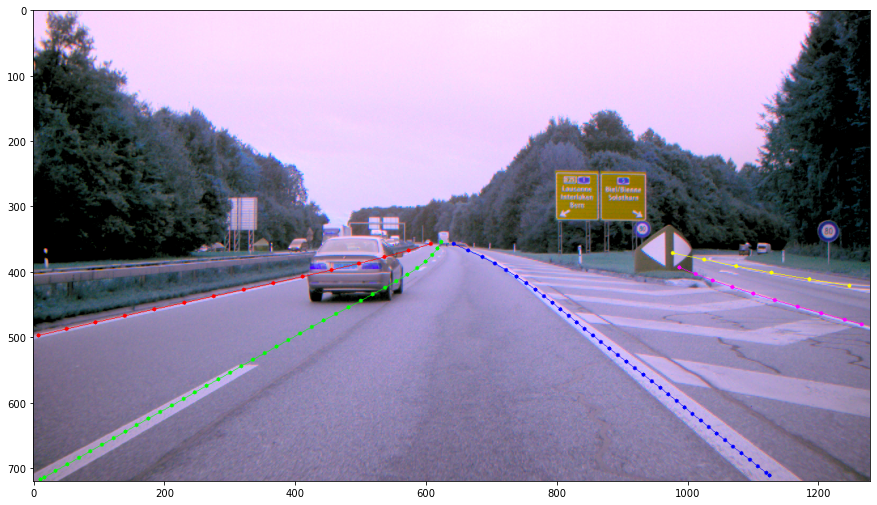

In [24]:
########################### Show samples of Dataset
from tools import spline_interp_step
import matplotlib.pyplot as plt
color = [(255,0,0), (0,255,0),(0,0,255),\
         (255,255,0),(255,0,255),(0,255,255),(255,255,255),\
         (100,255,0),(100,0,255),(255,100,0),(0,100,255),(255,0,100),(0,255,100),(0,0,0)]

# 53235 13122 53237 24049 53235 47154 7994 7995 45315 161 2570 2739
dtid = 2570
#tid = to_datset_id(dtid)
#temp_data_item = dataset[tid]
temp_data_item = dataset_orig[dtid]

img = cv2.imread('../dataset/lane_detection/test/images/'+temp_data_item.img_path)
img_cp = copy.deepcopy(img)
for idx, pts in enumerate(temp_data_item.lanes):
    # print([int(pt[1]) for pt in pts])
    # pts = spline_interp_step(pts, 30)
    # pts = sorted(pts, key=lambda x: x[1], reverse=True)
    # pts = refine(pts)
    print([(int(pt[0]), int(pt[1])) for pt in pts])
    for i in range(len(pts)-1):
        x1 = int(pts[i][0])
        y1 = int(pts[i][1])
        x2 = int(pts[i+1][0])
        y2 = int(pts[i+1][1])
        cv2.circle(img, (x1,y1), 3, color[idx], -1)
        cv2.circle(img, (x2,y2), 3, color[idx], -1)
        cv2.line(img, (x1,y1), (x2,y2), color[idx], 1)

            
plt.figure(figsize=(15, 15))
plt.imshow(img)
# plt.imshow(img_cp)
plt.show() 

In [47]:
def to_datset_id(img_idx):
    for i in range(112):
        offset = 80 * 6
        for k in range(80):
            for j in range(6):
                if (i*offset + k*6 + j) == img_idx:
                    # print(i,j,k)
                    out = j*(112*80+77)+ (1 if j>0 else 0) + (i*80) + k
                    # print(out)
    return out